In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import tqdm as notebook_tqdm
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy
from sklearn.neighbors import NearestNeighbors

In [46]:
from cache import cache_np
from embeddings import encode
from metrics import (
    cosine_distance,
    euclidean_distance,
    cosine_distance_matrix,
    cosine_similarity_matrix,
)
from loaders import load_user_item_matrix, Loader
from filters import items_of_user, find_closest_vectors
from evaluation import calculate_tp_fp_fn_tn, calculate_precision_and_recall, f1_score
from recommenders import Recommender


### Load CiteULike-a dataset


In [4]:
loader = Loader("../datasets/citeulike-a/")
loader.load_docs().head()


,doc.id,citeulike.id,raw.title,raw.abstract
0,1,42.0,The metabolic world of Escherichia coli is not...,To elucidate the organizational and evolutiona...
1,2,43.0,Reverse Engineering of Biological Complexity,Advanced technologies and biology have extreme...
2,3,44.0,Exploring complex networks,"The study of networks pervades all of science,..."
3,4,46.0,Comparative assessment of large-scale data set...,Comprehensive protein protein interaction maps...
4,5,47.0,Navigation in a small world,The small-world phenomenon — the principle tha...


In [5]:
reco = Recommender(loader)


### Search by title


In [6]:
_, indices = reco.embedding_title_search("machine learning", 5)

loader.load_docs().iloc[indices]


,doc.id,citeulike.id,raw.title,raw.abstract
1029,1030,110407.0,Artificial Intelligence,{<i>Artificial Intelligence</i> is a somewhat ...
1181,1182,115590.0,Machine Learning,Machine Learning is the study of methods for p...
724,725,97160.0,Data Mining,Group 14 used data-mining strategies to evalua...
2388,2389,165116.0,Random Forests,Abstract. Random forests are a combination of ...
10905,10906,1197459.0,Pattern Recognition and Machine Learning,The dramatic growth in practical applications ...


### Search by abstract


In [7]:
_, indices = reco.embedding_abstract_search("machine learning", 5)

loader.load_docs().iloc[indices]


,doc.id,citeulike.id,raw.title,raw.abstract
1181,1182,115590.0,Machine Learning,Machine Learning is the study of methods for p...
10969,10970,1218597.0,Some studies in machine learning using the gam...,Two machine-learning procedures have been inve...
4027,4028,297799.0,Introduction to Machine Learning (Adaptive Com...,{The goal of machine learning is to program co...
4689,4690,340715.0,Data Mining: Practical Machine Learning Tools ...,As with any burgeoning technology that enjoys ...
11750,11751,1442986.0,Machine Learning and Its Applications to Biology,The term machine learning refers to a set of t...


### Papers read by some user


In [8]:
number_of_items_per_user = np.sum(loader.load_user_item_matrix(), axis=1)

chosen_user = 42
print(
    f"User #{chosen_user} has interacted with {number_of_items_per_user[chosen_user]} items"
)

print("Their items (10):")
relevant = reco.relevant_items(chosen_user)
loader.load_docs().iloc[relevant]


User #42 has interacted with 42 items
Their items (10):


,doc.id,citeulike.id,raw.title,raw.abstract
41,42,242.0,"XML, bioinformatics and data integration.",Motivation: The eXtensible Markup Language (XM...
701,702,95914.0,On the criteria to be used in decomposing syst...,This paper discusses modularization as a mecha...
888,889,104334.0,Design Patterns: Elements of Reusable Object-O...,_Design Patterns_ is based on the idea that th...
1041,1042,111765.0,No {S}ilver {B}ullet: {E}ssence and {A}ccident...,Of all the monsters that fill the nightmares o...
1136,1137,115159.0,Software Architecture: Perspectives on an Emer...,{ Good software developers often adopt one or...
1375,1376,121547.0,Writing {G}ood {S}oftware {E}ngineering {R}ese...,Software engineering researchers solve problem...
1460,1461,126034.0,Software Engineering Economics,This paper summarizes the current state of the...
1787,1788,133565.0,"Generative Programming: Methods, Tools, and Ap...",{The authors present a grand tour of Generativ...
1933,1934,140601.0,Code Complete: A Practical Handbook of Softwar...,"For more than a decade, Steve McConnell, one o..."
1947,1948,140708.0,Software Systems as Complex Networks: Structur...,Software systems emerge from mere keystrokes t...


### Item-KNN Content-Based Recommender


In [9]:
_, recommendations = reco.embedding_similar_items(relevant[0], k=5 + 1)
recommendations = np.setdiff1d(recommendations, relevant)

loader.load_docs().iloc[recommendations]


,doc.id,citeulike.id,raw.title,raw.abstract
2689,2690,192797.0,Data on the Web: from relations to semistructu...,<I>Data on the Web: From Relations to Semistru...
13360,13361,2587350.0,State of the nation in data integration for bi...,Data integration is a perennial issue in bioin...
15887,15888,5444878.0,An XML transfer schema for exchange of genomic...,"ABSTRACT: BACKGROUND: Genomic analysis, partic..."
16137,16138,6016560.0,phyloXML: XML for evolutionary biology and com...,{BACKGROUND:Evolutionary} trees are central to...
16894,16895,7801404.0,BioXSD: the common data-exchange format for ev...,MOTIVATION: The world-wide community of life s...


### User-KNN CF


In [10]:
ratings = reco.collaborative_user_knn(chosen_user, 10)
# ratings = np.setdiff1d(recommendations, relevant)

print("max score", np.max(ratings))

recommendations = np.argsort(ratings)[::-1]

loader.load_docs().iloc[recommendations[:5]]


max score 0.6697104584975075


,doc.id,citeulike.id,raw.title,raw.abstract
4257,4258,312079.0,{Feature--Oriented Domain Analysis (FODA) Feas...,Successful software reuse requires the systema...
4252,4253,312060.0,Staged Configuration Using Feature Models,Feature modeling is an important approach to c...
4262,4263,312116.0,On the Notion of Variability in Software Produ...,Software product lines are used in companies t...
4255,4256,312063.0,Domain--Specific Language Design Requires Feat...,A domain-specific language (DSL) provides a no...
4133,4134,305952.0,"Feature Models, Grammars, and Propositional Fo...",Feature models are used to specify members of ...


In [11]:
from evaluation import is_there_a_hit, hitrate


def evaluate(k=10, weight_method="user-similarity"):
	m = loader.num_users()
	sum_prec, sum_recall = 0, 0
	hits = np.zeros(m)


	for user_id in range(m):
		if weight_method == "random":
			ratings = np.random.random_sample(reco.loader.num_items())
		elif weight_method == "identity":
			ratings = reco.relevant_items(user_id)
		elif weight_method == "user-similarity":
			ratings = reco.collaborative_user_knn(user_id, k)
		elif weight_method == "text-similarity":
			ratings = reco.embedding_weighted_similar_items(user_id, k, pooling="max", embeddings="text")
		elif weight_method == "title-similarity":
			ratings = reco.embedding_weighted_similar_items(user_id, k, pooling="max", embeddings="title")
		elif weight_method == "abstract-similarity":
			ratings = reco.embedding_weighted_similar_items(user_id, k, pooling="max", embeddings="abstract")
		else:
			raise ValueError(f"Unknown weighting method \"{weight_method}\"")

		recommendations = np.argsort(ratings)[::-1][:k]

		relevant = reco.relevant_items(user_id)
		hits[user_id] = is_there_a_hit(recommendations, relevant)

		tp_fp_fn_tn = calculate_tp_fp_fn_tn(recommendations, relevant, loader.num_items())
		precision, precall = calculate_precision_and_recall(tp_fp_fn_tn)

		sum_prec += precision
		sum_recall += precall


	overall_precision = sum_prec / m
	overall_recall = sum_recall / m
	overall_hitrate = hitrate(hits)

	return {
		"precision": overall_precision,
		"recall": overall_recall,
		"hitrate": overall_hitrate,
		"k": k,
		"weight_method": weight_method,
	}

	# print(f"k = {k}")
	# print(f"Overall precision: {overall_precision}")
	# print(f"Overall recall: {overall_recall}")
	# print(f"Overall hitrate: {overall_hitrate}")

In [63]:
forget_rates = [0.5, 0.75, 0.9, 0.97]
weight_methods = ["random", "identity", "user-similarity", "text-similarity", "title-similarity", "abstract-similarity"]
ks = [5, 10, 25, 50]


In [12]:
results = []

In [62]:
for forget_rate in forget_rates:
	# Forget previous augmented user-item matrix and reload
	reco.loader.user_item_matrix = None
	original_user_item_matrix = reco.loader.load_user_item_matrix().copy()


	for user_id in range(loader.num_users()):
		relevant = reco.relevant_items(user_id)
		np.random.shuffle(relevant)

		to_remove = relevant[:int(len(relevant) * forget_rate)]
		reco.loader.user_item_matrix[user_id, to_remove] = 0


	num_ratings_per_user = np.sum(reco.loader.user_item_matrix, axis=1)
	print(forget_rate, np.where(num_ratings_per_user == 0)[0])

	for weight_method in weight_methods:
		for k in ks:
			result = evaluate(k, weight_method)
			result["forget_rate"] = forget_rate

			print(result)
			results.append(result)

		print("----------")

	print("==========")


print()
print(results)

0.5 []


TypeError: 'numpy.ndarray' object is not callable

In [50]:
def filter_results(forget_rate, weight_method):
	def predicate(result):
		return result["forget_rate"] == forget_rate and result["weight_method"] == weight_method

	return np.array(list(filter(predicate, results)))


def get_field(iterable, field):
	return np.array(list(map(lambda item: item[field], iterable)))


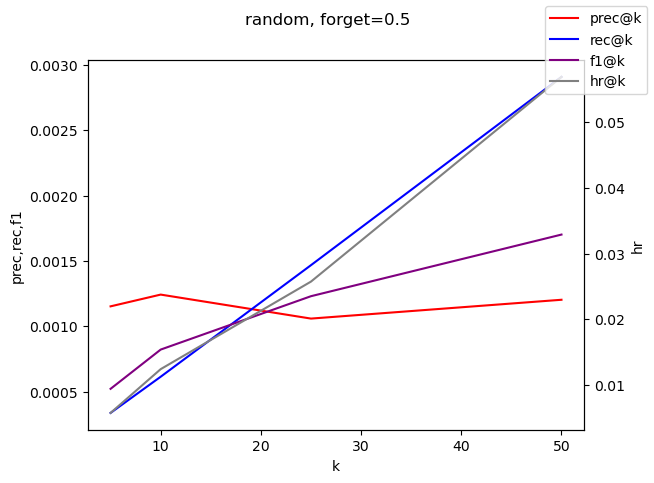

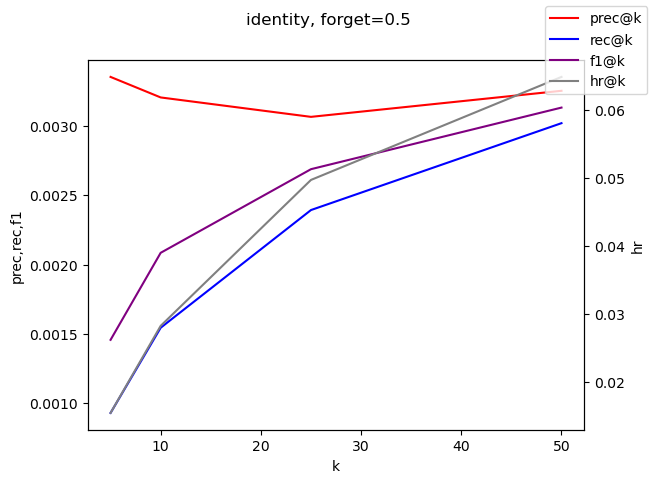

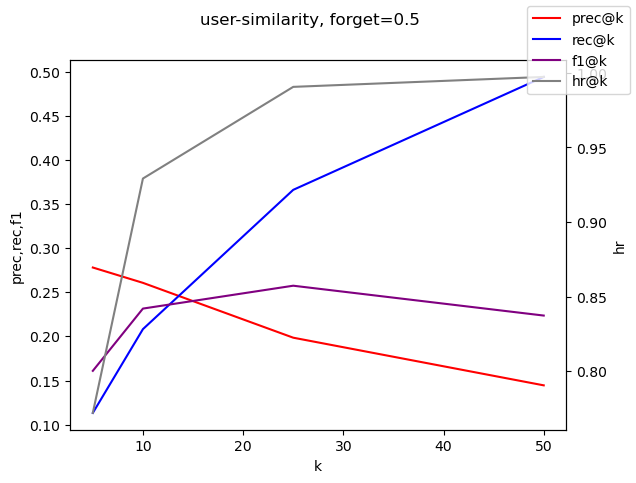

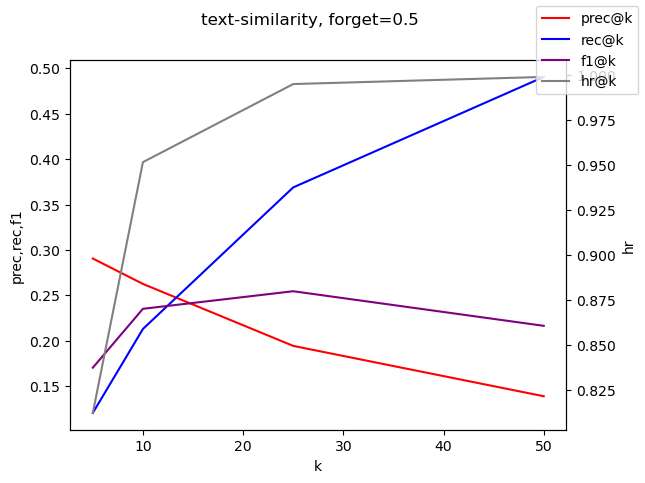

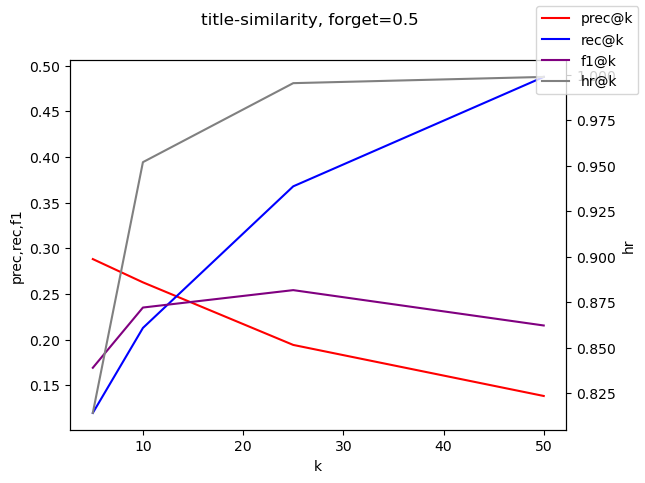

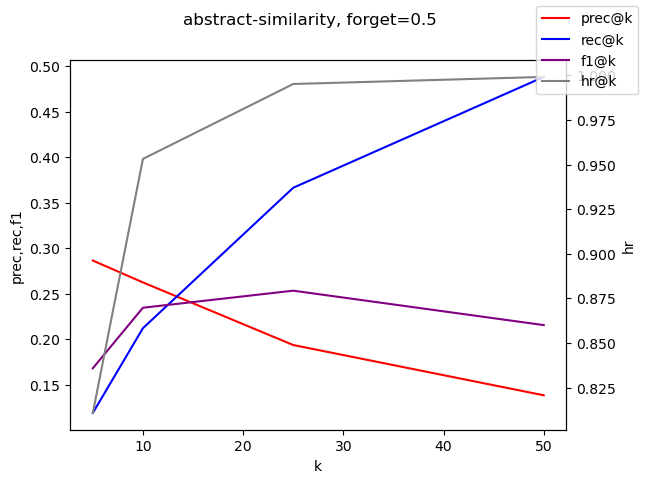

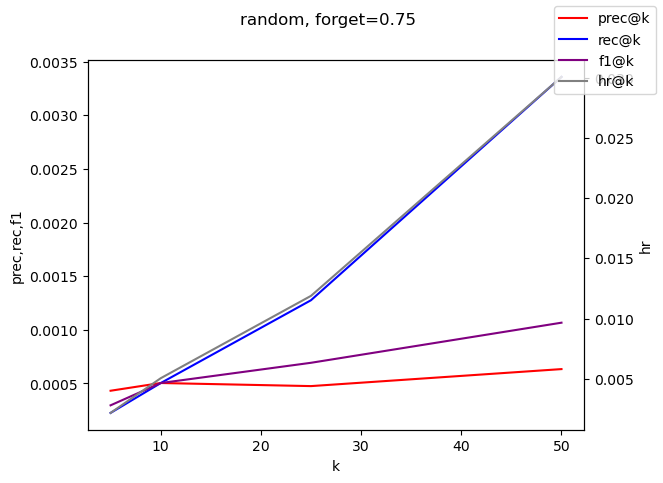

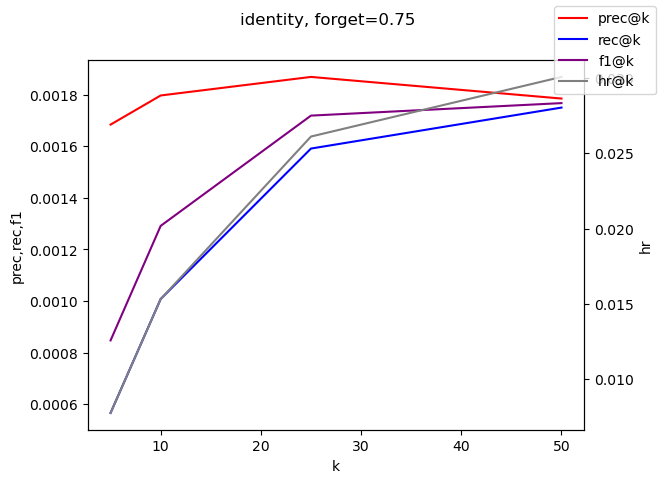

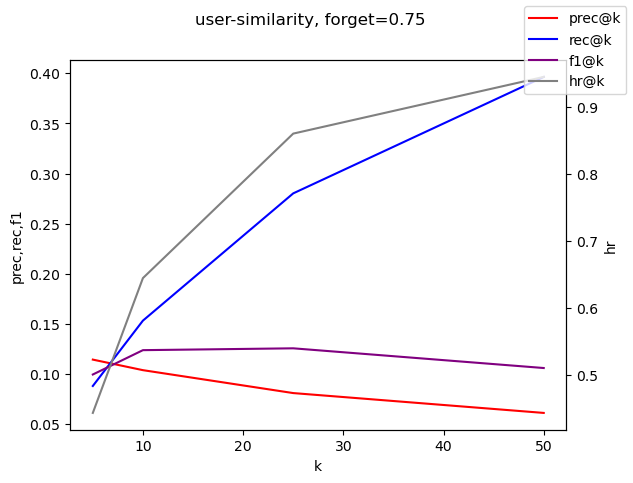

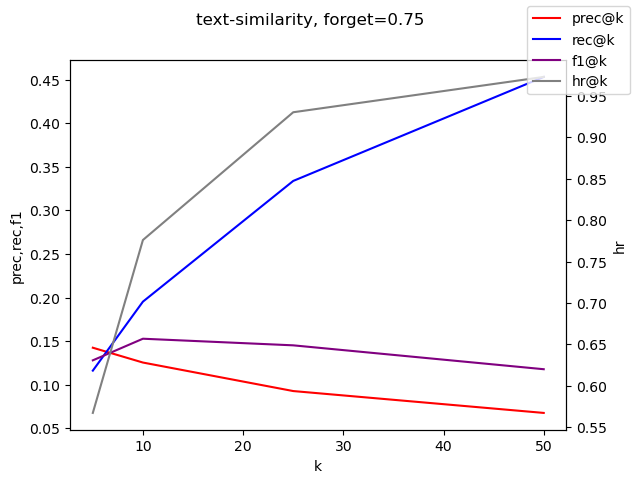

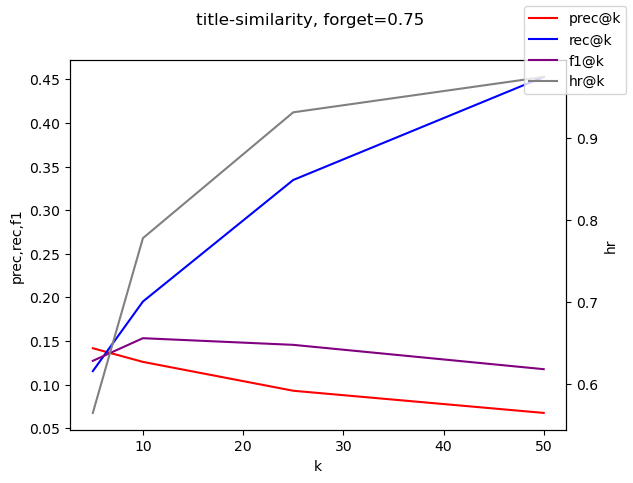

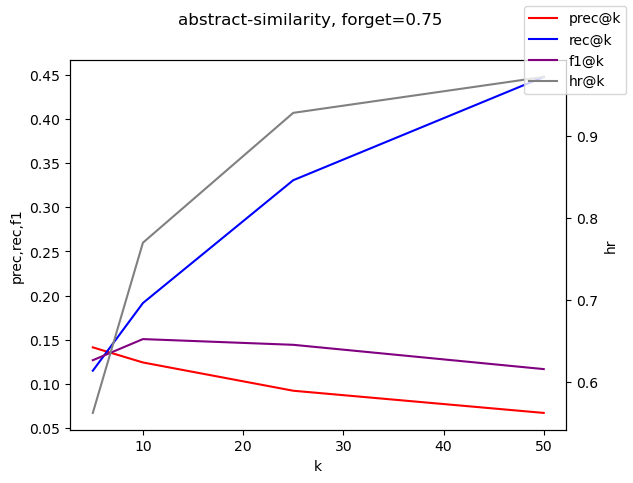

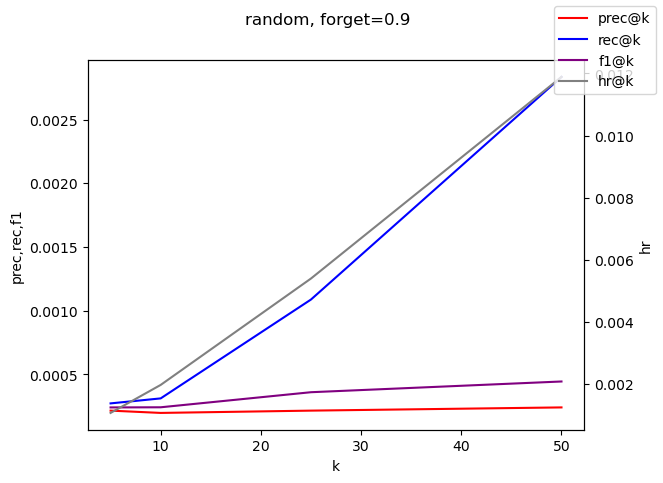

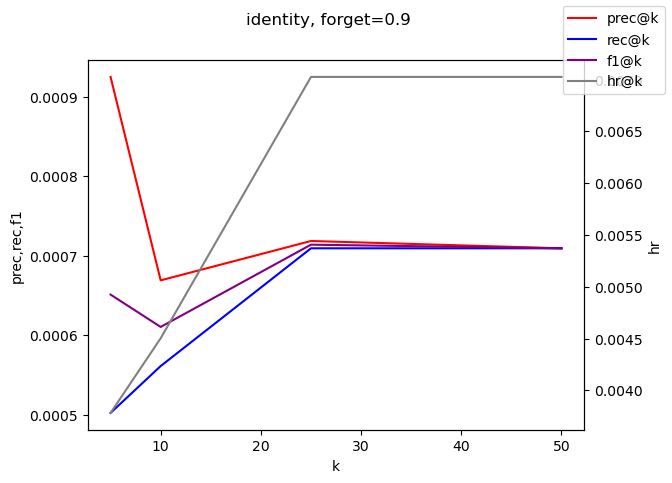

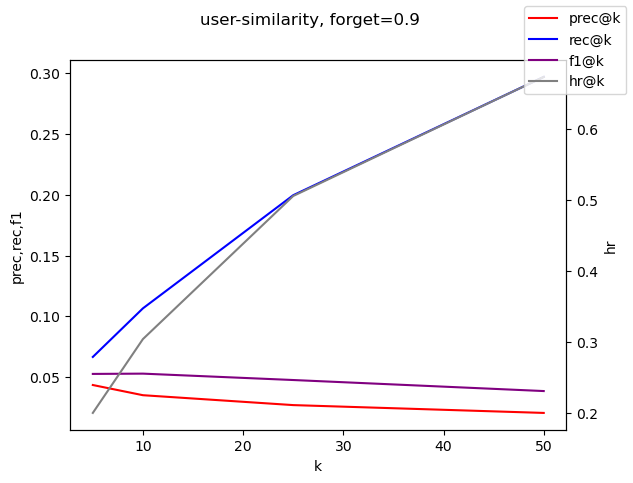

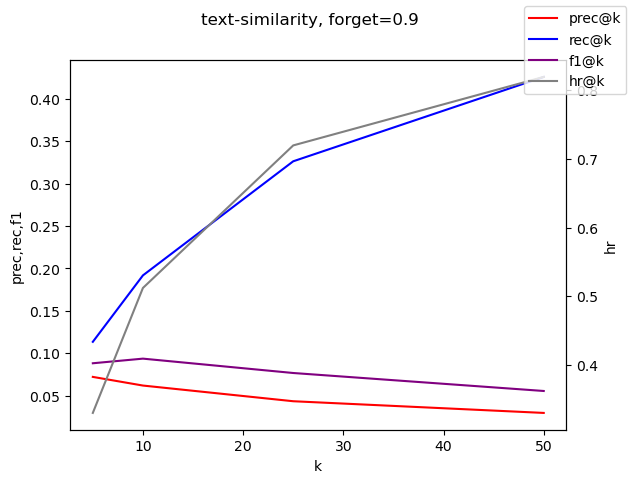

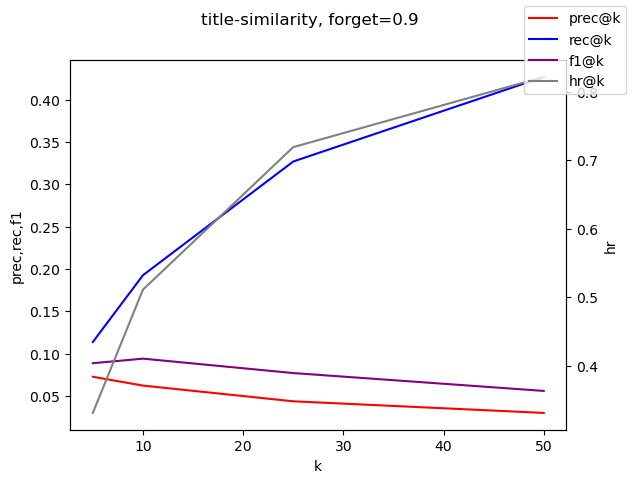

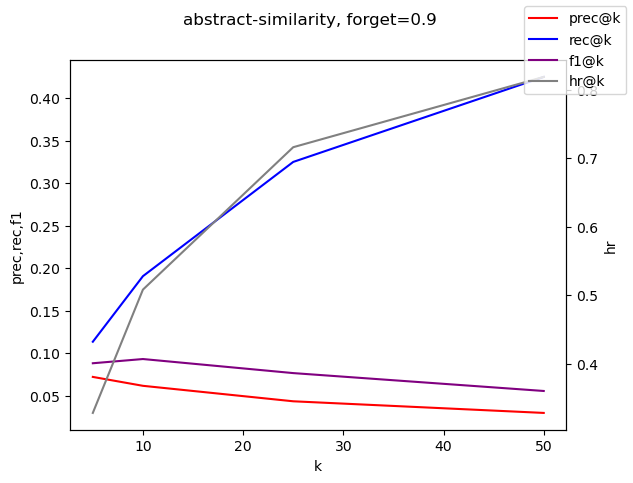

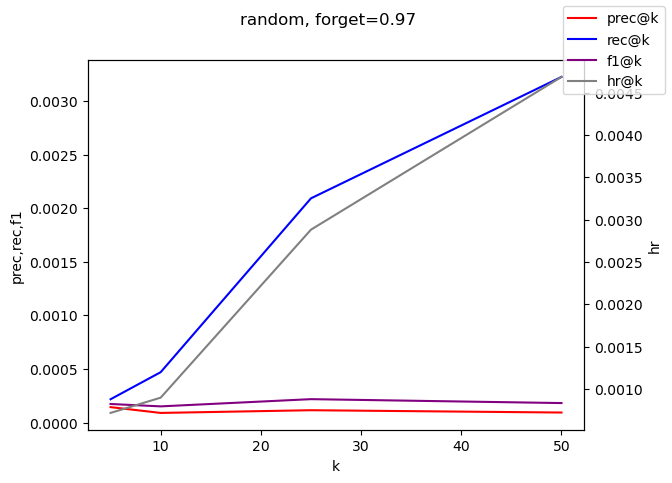

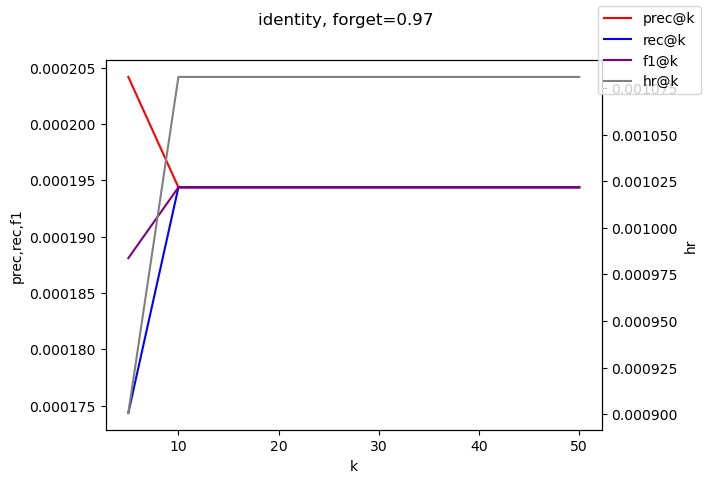

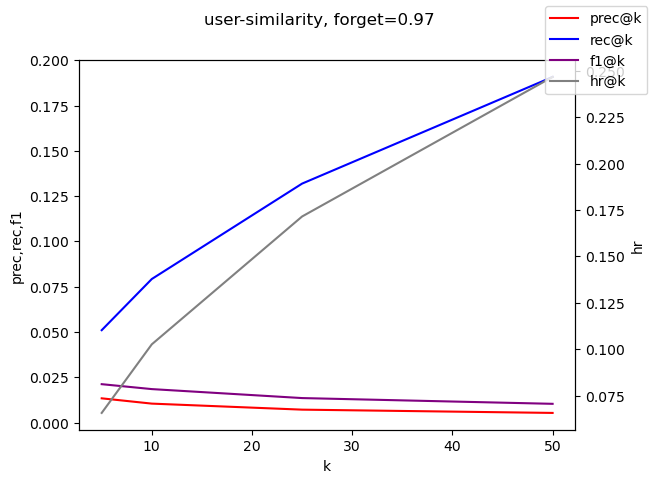

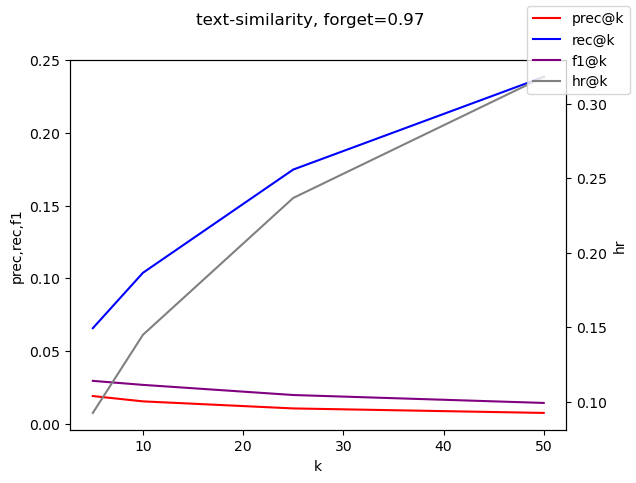

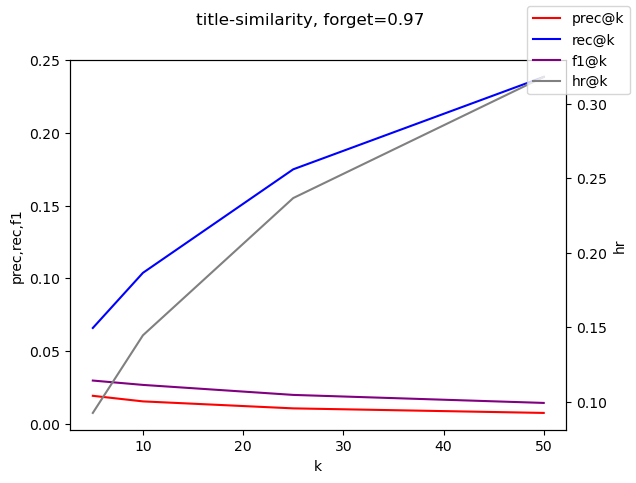

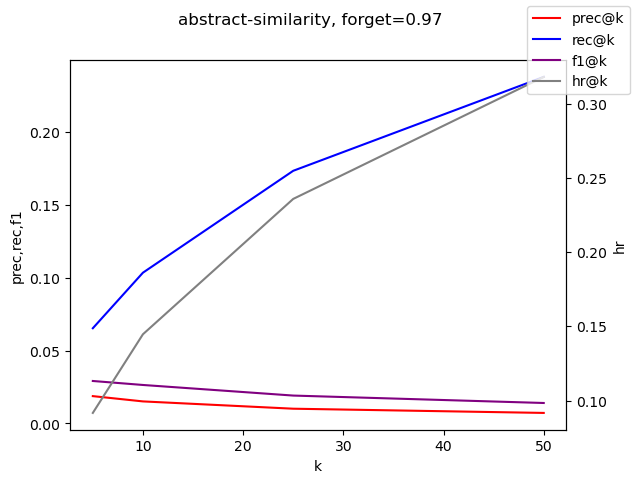

In [60]:
for forget_rate in forget_rates:
	for weight_method in weight_methods:
		series = filter_results(forget_rate, weight_method)

		title = f"{weight_method}, forget={forget_rate}"

		k = get_field(series, "k")
		precision = get_field(series, "precision")
		recall = get_field(series, "recall")
		hitrate = get_field(series, "hitrate")
		f1 = f1_score(precision, recall)

		fig, ax1 = plt.subplots()
		ax1.set_xlabel("k")
		ax1.set_ylabel("prec,rec,f1")

		ax1.plot(k, precision, color="red", label="prec@k")
		ax1.plot(k, recall, color="blue", label="rec@k")
		ax1.plot(k, f1, color="purple", label="f1@k")

		ax2 = ax1.twinx()
		ax2.set_ylabel("hr")

		ax2.plot(k, hitrate, color="grey", label="hr@k")

		fig.legend()
		fig.suptitle(title)

		plt.show()


#### User-KNN CF, remove 20% of data

```
k = 5
Overall precision: 0.51695190055846
Overall recall: 0.1387636962170855
Overall hitrate: 0.9610880922356332
```

#### User-KNN CF, remove 50% of data

```
k = 5
Overall precision: 0.2670509818050912
Overall recall: 0.11073630845063094
Overall hitrate: 0.7522968834444245
```


#### User-KNN CF, remove 80% of data

```
k = 5
Overall precision: 0.08614664024499832
Overall recall: 0.07767372538841275
Overall hitrate: 0.35507115834984687
```

#### User-KNN CF, remove 90% of data

```
k = 5
Overall precision: 0.04089353269681074
Overall recall: 0.06546859032863968
Overall hitrate: 0.19221761844712665
```

#### User-KNN CF, remove 97% of data

```
k = 25
Overall precision: 0.011378130066654455
Overall recall: 0.15835847766930294
Overall hitrate: 0.2588722752657179

k = 50
Overall precision: 0.008737164474869627
Overall recall: 0.2331222644018906
Overall hitrate: 0.3734462259052423
```

#### User-KNN CF with embeddings, mean pooling, remove 20% of data

```
k = 5
Overall precision: 0.4956584399207363
Overall recall: 0.13239642466878587
Overall hitrate: 0.955503512880562
```

#### User-KNN CF with embeddings, mean pooling, remove 50% of data

```
k = 5
Overall precision: 0.25854800936769207
Overall recall: 0.10877273200838149
Overall hitrate: 0.7524770311655558
```

#### User-KNN CF with embeddings, mean pooling, remove 80% of data

```
k = 5
Overall precision: 0.09785624211853486
Overall recall: 0.09482676236221312
Overall hitrate: 0.41019636101603313
```

#### User-KNN CF with embeddings, mean pooling, remove 90% of data

```
k = 5
Overall precision: 0.05717888668708194
Overall recall: 0.09709792114013878
Overall hitrate: 0.2639164114573951
```

#### User-KNN CF with embeddings, max pooling, remove 20% of data

```
k = 5
Overall precision: 0.5060349486578989
Overall recall: 0.1366200223000594
Overall hitrate: 0.9594667627454513
```

#### User-KNN CF with embeddings, max pooling, remove 50% of data

```
k = 5
Overall precision: 0.27440100882725055
Overall recall: 0.11707310483356358
Overall hitrate: 0.7912087912087912
```

#### User-KNN CF with embeddings, max pooling, remove 80% of data

```
k = 5
Overall precision: 0.12531075481895318
Overall recall: 0.12139318334689386
Overall hitrate: 0.5226085390019817
```

#### User-KNN CF with embeddings, max pooling, remove 90% of data

```
k = 5
Overall precision: 0.07432894973878339
Overall recall: 0.119337015923129
Overall hitrate: 0.3390380111691587
```

#### User-KNN CF with embeddings, max pooling, remove 97% of data

```
k = 25
Overall precision: 0.0191100702576118
Overall recall: 0.23516965484768407
Overall hitrate: 0.39236173662403173

k = 50
Overall precision: 0.013348946135831662
Overall recall: 0.31179676788825644
Overall hitrate: 0.49270401729418123
```

### Item-KNN CF


In [16]:
item_scores = np.zeros(loader.num_items())
print(loader.num_items())

for item_id in range(loader.num_items()):
    item_scores[item_id] = reco.collaborative_item_knn(chosen_user, item_id, 10)

print("max score", np.max(item_scores))
recommendations = np.argsort(item_scores)[::-1]

loader.load_docs().iloc[recommendations[:5]]


16980
max score 0.13704739338929478


,doc.id,citeulike.id,raw.title,raw.abstract
12895,12896,2207732.0,Structural holes and good ideas,doi: 10.1086/421787 This article outlines the ...
4254,4255,312062.0,{A} comprehensive approach for the development...,Research over the past decade has revealed tha...
3847,3848,273791.0,Designing Web Usability,{Creating Web sites is easy. Creating sites th...
4253,4254,312061.0,Formalizing cardinality-based feature models a...,Feature modeling is an important approach to c...
4259,4260,312090.0,Programming with Constraints: An Introduction,The job of the constraint programmer is to use...


### User-KNN CF and weigh users by max item similarity


In [17]:
k_items = 10
item_scores = reco.embedding_weighted_similar_items(
    chosen_user, k_users=20, pooling="max"
)
recommendations = np.argsort(item_scores)[::-1][:k_items]
recommendations = np.setdiff1d(recommendations, relevant)

loader.load_docs().iloc[recommendations]


,doc.id,citeulike.id,raw.title,raw.abstract
701,702,95914.0,On the criteria to be used in decomposing syst...,This paper discusses modularization as a mecha...
888,889,104334.0,Design Patterns: Elements of Reusable Object-O...,_Design Patterns_ is based on the idea that th...
1454,1455,125532.0,Aspect-Oriented Programming,<E6> </E6>We have found many <SPAN style='back...
3115,3116,221703.0,The next 700 programming languages,A family of unimplemented computing languages ...
3498,3499,245782.0,Software Factories: Assembling Applications wi...,{The architects of the Software Factories meth...
4252,4253,312060.0,Staged Configuration Using Feature Models,Feature modeling is an important approach to c...
4256,4257,312073.0,Integrating Feature Modeling with the {RSEB},We have integrated the feature modeling of Fea...
4262,4263,312116.0,On the Notion of Variability in Software Produ...,Software product lines are used in companies t...
5322,5323,386084.0,Software Product Line Engineering: Foundations...,"{This textbook addresses students, professiona..."
7914,7915,613130.0,Staged configuration through specialization an...,Feature modeling is a key technique for captur...


# Using data and splits from Decrema et al. 2019


In [18]:
from split_loader import Loader as Loader2


loader2 = Loader2(
    "../RecSys2019_DeepLearning_Evaluation/data/data_split/splitted_data_URM_dict",
    "../RecSys2019_DeepLearning_Evaluation/data/data_split/splitted_data_ICM_dict",
)


In [19]:
urm_train = loader2.load_user_rating_matrix("train").toarray()
urm_validation = loader2.load_user_rating_matrix("validation").toarray()
urm_test = loader2.load_user_rating_matrix("test").toarray()


In [20]:
urm_train.shape, urm_validation.shape, urm_test.shape


((5551, 16980), (5551, 16980), (5551, 16980))

In [21]:
np.sum(urm_train), np.sum(urm_validation), np.sum(urm_test)


(5551.0, 1162.0, 199435.0)

In [22]:
num_ratings = np.sum(urm_train) + np.sum(urm_validation) + np.sum(urm_test)


def percentage(urm):
    percentage = 100 * np.sum(urm) / num_ratings
    return f"{percentage:.2f}%"


percentage(urm_train), percentage(urm_validation), percentage(urm_test)


('2.69%', '0.56%', '96.74%')

In [23]:
# Set non-zero shrinkage to avoid division by zero
urm_test_user_similarities = cosine_similarity_matrix(urm_train, urm_train, h=0.1)
urm_test_item_similarities = cosine_similarity_matrix(urm_train.T, urm_train.T, h=0.1)

urm_test_user_similarities.shape, urm_test_item_similarities.shape


((5551, 5551), (16980, 16980))

In [24]:
user_diff = np.sum(urm_test_user_similarities) - urm_test_user_similarities.shape[0] * urm_test_user_similarities.shape[1]
item_diff = np.sum(urm_test_item_similarities) - urm_test_item_similarities.shape[0] * urm_test_item_similarities.shape[1]

user_diff, item_diff


(-30805312.818181816, -288316423.45311403)